In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [52]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001
train_dataset = dsets.MNIST(root ='./data',train = True,transform = transforms.ToTensor(),download = True)
test_dataset = dsets.MNIST(root ='./data',train = False,transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle = True)

In [53]:
class Model(nn.Module):
    def __init__(self, in_features=784, h1=10, h2=10, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate,weight_decay=0.003)
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=0.003)
criterion = nn.CrossEntropyLoss()

In [54]:
train_loss=[]
test_acc=[]
val_loss=[]
for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        # Forward + Backward + Optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #accuracy = 100 * correct.item() / labels.size(0)
        if (i + 1) % 50 == 0: 
            train_loss.append(loss.item())
            with torch.no_grad():
                correct=0
                total = 0
                l=0
                for images, labels in test_loader:
                    images = Variable(images.view(-1, 28 * 28))
                    outputs = model(images)
                    l+= criterion(outputs, labels).item()
                    for j in range(outputs.size()[0]):
                        total+=1
                        if (outputs[j].argmax().item() ==labels[j]): correct+=1
            test_err=(correct / total)
            test_acc.append(test_err)
            val_loss.append(l/total*100)
        if (i + 1) % 100 == 0: 
            print('Epoch: [% d/% d],  Loss: %.4f, Accuracy:%.2f' % (epoch + 1, num_epochs, loss.item(), test_err))

Epoch: [ 1/ 5],  Loss: 1.6375, Accuracy:0.52
Epoch: [ 1/ 5],  Loss: 0.9230, Accuracy:0.76
Epoch: [ 1/ 5],  Loss: 0.7642, Accuracy:0.81
Epoch: [ 1/ 5],  Loss: 0.6772, Accuracy:0.84
Epoch: [ 1/ 5],  Loss: 0.6007, Accuracy:0.85
Epoch: [ 1/ 5],  Loss: 0.4234, Accuracy:0.86
Epoch: [ 2/ 5],  Loss: 0.4106, Accuracy:0.87
Epoch: [ 2/ 5],  Loss: 0.3650, Accuracy:0.88
Epoch: [ 2/ 5],  Loss: 0.4568, Accuracy:0.89
Epoch: [ 2/ 5],  Loss: 0.3180, Accuracy:0.89
Epoch: [ 2/ 5],  Loss: 0.4832, Accuracy:0.90
Epoch: [ 2/ 5],  Loss: 0.4442, Accuracy:0.90
Epoch: [ 3/ 5],  Loss: 0.2074, Accuracy:0.90
Epoch: [ 3/ 5],  Loss: 0.2201, Accuracy:0.90
Epoch: [ 3/ 5],  Loss: 0.2893, Accuracy:0.90
Epoch: [ 3/ 5],  Loss: 0.2025, Accuracy:0.90
Epoch: [ 3/ 5],  Loss: 0.3514, Accuracy:0.91
Epoch: [ 3/ 5],  Loss: 0.2524, Accuracy:0.91
Epoch: [ 4/ 5],  Loss: 0.2483, Accuracy:0.91
Epoch: [ 4/ 5],  Loss: 0.1719, Accuracy:0.91
Epoch: [ 4/ 5],  Loss: 0.3525, Accuracy:0.91
Epoch: [ 4/ 5],  Loss: 0.2765, Accuracy:0.91
Epoch: [ 4

In [55]:
correct = 0
total = 0

mpred=[]
mlabel=[]
with torch.no_grad():
    for images, labels in train_loader:
        images = Variable(images.view(-1, 28 * 28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        mlabel.append(labels.numpy())
        mpred.append(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the model on 10000 test datas : %.2f %%' % (100 * correct / total))

Accuracy of the model on 10000 test datas : 91.84 %


Text(0.5, 1.0, 'Training Loss')

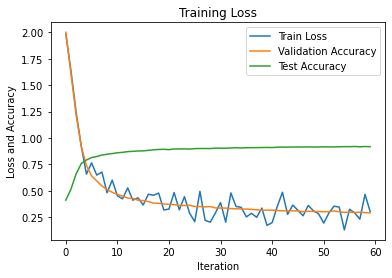

In [56]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(test_acc)
plt.legend(["Train Loss","Validation Accuracy","Test Accuracy"])
plt.xlabel("Iteration")
plt.ylabel("Loss and Accuracy")
plt.title("Training Loss")